In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
list_url = ['https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/application_record-1.csv',
            'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/application_record-2.csv',
            'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/application_record-3.csv']

df = pd.concat([pd.read_csv(f) for f in list_url],ignore_index=True)

In [3]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df.shape

(438557, 18)

In [5]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members'],
      dtype='object')

In [7]:
df[['days_birth', 'days_employed']].sample(10)

,days_birth,days_employed
87518,-9908,-1219
90908,-13798,-1400
46193,-14939,-5384
240988,-13591,-2103
250553,-20733,-13539
275977,-16351,-2152
198200,-20107,-3229
314867,-18443,-267
165599,-13818,-3519
424747,-14997,-1072


In [8]:
df_days = df[['days_birth', 'days_employed']].copy()
df_days.shape

(438557, 2)

In [9]:
df_days_active = df_days[df_days.days_employed < 0]

In [10]:
df_days_active.head()

,days_birth,days_employed
0,-12005,-4542
1,-12005,-4542
2,-21474,-1134
3,-19110,-3051
4,-19110,-3051


In [11]:
(df_days_active['days_birth'] > 0).sum()

0

In [12]:
df_days_active['days_birth'] = np.abs(df_days_active['days_birth'])
df_days_active['days_employed'] = np.abs(df_days_active['days_employed'])
df_days_active.head()

,days_birth,days_employed
0,12005,4542
1,12005,4542
2,21474,1134
3,19110,3051
4,19110,3051


In [13]:
df_days_active.duplicated().sum() / df_days_active.shape[0]

0.7975541533141718

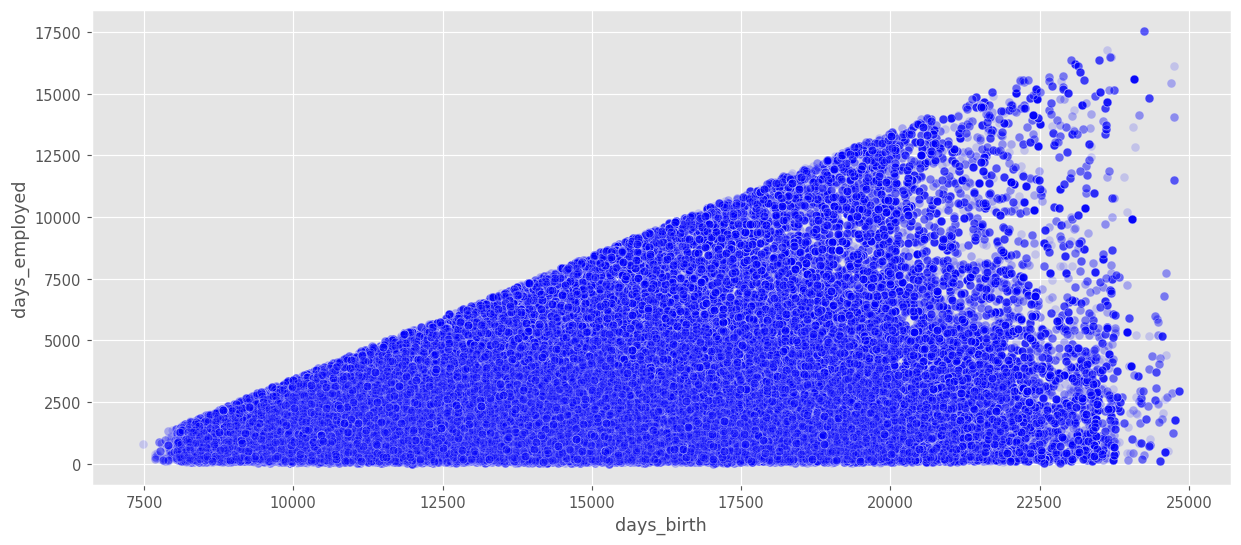

In [20]:
plt.figure(figsize=(14, 6), dpi=105)
sns.scatterplot(x='days_birth', y='days_employed', data=df_days_active,
                alpha=0.15, lw=1.5, color='b'
                );